In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [11]:
import random
seed = random.randint(1, 1000)
print(seed)

923


In [12]:
img_size = 100
targetx = 100
targety = 100

epochs = 50
batch_size = 64

In [13]:
train_dir = "/content/drive/MyDrive/ProiectLab/RAF_DB/DATASET/train"
test_dir = "/content/drive/MyDrive/ProiectLab/RAF_DB/DATASET/test"

In [14]:
"""
Data Augmentation
--------------------------
"""

train_datagen = ImageDataGenerator(
        rescale=1./255,
        brightness_range=[0.9,1.1],
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.5)

In [15]:
"""
Applying data augmentation to the images
"""
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=seed)

val_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        seed=seed,
     subset="training")

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
    subset="validation",
        seed=seed)

Found 7753 images belonging to 7 classes.
Found 1535 images belonging to 7 classes.
Found 1533 images belonging to 7 classes.


In [16]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(targetx,targety,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 batch_normalization_6 (Bat  (None, 100, 100, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 50, 50, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 128)      

In [17]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = val_generator)

Epoch 1/50
122/122 [==============================] - 30s 206ms/step - loss: 11.7341 - accuracy: 0.2874 - val_loss: 8.4724 - val_accuracy: 0.2000
Epoch 2/50
122/122 [==============================] - 25s 207ms/step - loss: 3.0272 - accuracy: 0.3156 - val_loss: 5.5035 - val_accuracy: 0.2013
Epoch 3/50
122/122 [==============================] - 27s 219ms/step - loss: 3.8268 - accuracy: 0.3431 - val_loss: 4.3355 - val_accuracy: 0.2443
Epoch 4/50
122/122 [==============================] - 25s 202ms/step - loss: 2.6449 - accuracy: 0.3818 - val_loss: 4.7901 - val_accuracy: 0.1616
Epoch 5/50
122/122 [==============================] - 26s 209ms/step - loss: 2.5766 - accuracy: 0.4308 - val_loss: 3.1497 - val_accuracy: 0.2384
Epoch 6/50
122/122 [==============================] - 25s 202ms/step - loss: 2.8659 - accuracy: 0.4614 - val_loss: 3.9354 - val_accuracy: 0.1961
Epoch 7/50
122/122 [==============================] - 25s 207ms/step - loss: 3.9540 - accuracy: 0.4757 - val_loss: 3.7369 - val_a

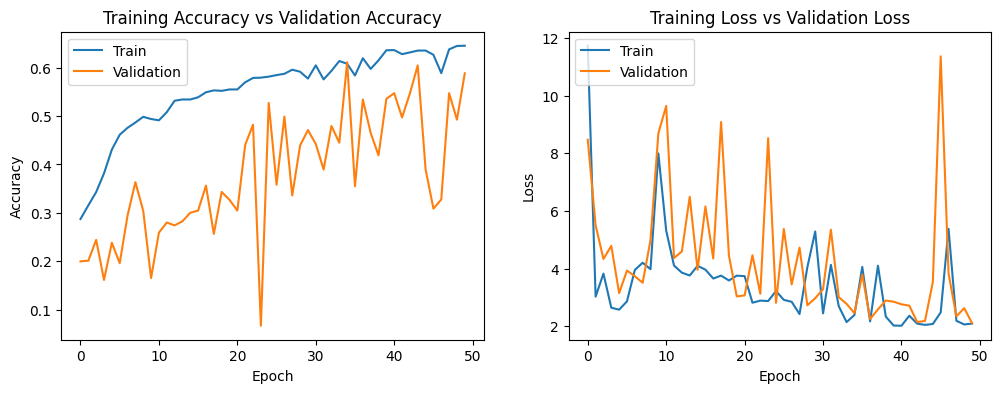

In [18]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [19]:
model.save('model_optimal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(100, 100, 3)


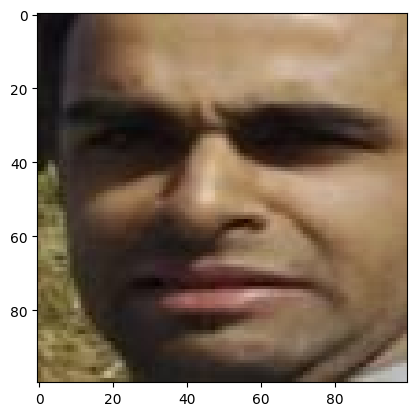

In [20]:
import keras.utils as image
img = image.load_img("/content/drive/MyDrive/ProiectLab/RAF_DB/DATASET/test/3/test_1555_aligned.jpg",target_size = (targetx,targety,3))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [21]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [22]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,targetx,targety,3)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 1s 651ms/step
[3.305578e-35, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


In [23]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Sad


In [24]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc   = model.evaluate(val_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, val_acc*100))

24/24 [==============================] - 3s 124ms/step - loss: 2.1090 - accuracy: 0.5883
final train accuracy = 69.51 , validation accuracy = 58.83


In [25]:
test_loss, test_acc   = model.evaluate(test_generator)
print("final test accuracy = {:.2f}".format(test_acc*100))

24/24 [==============================] - 346s 15s/step - loss: 1.9986 - accuracy: 0.6314
final test accuracy = 63.14


In [26]:
model.save_weights('model_weights.h5')